#PreProcessing

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from hazm import *
from hazm import sent_tokenize, word_tokenize
from hazm import WordEmbedding
from hazm import stopwords_list

In [ ]:
# THE MAIN AND CLEANED DATASET
dfc = pd.read_excel("output_with_index_Cleaned.xlsx")
dfc['title'][0]

'  سلام ۳۰ سالم هست و ۲ سال قرص جلوگیری ال-دی استفاده کردم ویکسال هست که قطع کردم و ۷ ماهِ برای بارداری اقدام کردم سیکل قاعدگی۲۸ روزه منظم داشتم که بعد از اقدام سیکلم بین ۲۹ تا ۳۵ روز نامنظم شد\\u200c. ماه مرداد مقدار آزمایش پروژسترون در روز ۲۱ سیکل 35nmol/L بود و آزمایش هورمونی در روز سوم پریود دادم که نتیجش این بود  oestradiol= 128 pmol/L FSH=8.5 U/L LH=2.6 U/L ماه شهریور روز ۳۰ سیکل پریود شدم که۴روز اول بین لکه و خونریزی کم بود و ۳روز بعد فقط دستمالم هاله ای از خون داشت و نوار بهداشتیم تمیز بود.فردای تموم شدن پریودم یعنی روز هشتم سیکل سونوگرافی داخلی انجام دادم که همه چی نرمال بود و نوشته بود The right ovary contains 5 antral follicles and left ovary contains 4 antral follicles. الان نزدیک یک هفته هست که دهانم تلخِ گاهی اوقات سرگیجه و حالت تهوع و رفلاکس دارم و زیر دلم دردهای خیلی کم مثل درد پریود دارم  آیا اینها علائم حاملگی است و اینکه دو هفته به پریود شدنم مونده و یک هفته قبل از پریودم اسکن dsma از کلیه دارم آیا این آزمایش خطری داره اگر حامله باشم؟ و قبل از پریود شدنم میتونم بی بی

In [ ]:
dfc['group'] = dfc['group'].str.strip()
# dfc['body'] = dfc['body'].str.strip()
# dfc['title'] = dfc['title'].str.strip()

In [ ]:
# grouped_data = dfc.groupby('group')
# group_counts = grouped_data.size()
# grouped_data.head()

In [ ]:
# group_statistics = grouped_data.describe()

In [ ]:
grouped_data = dfc.groupby('group').size().reset_index(name='count_of_group')
grouped_data

,group,count_of_group
0,ارتودنسی,11
1,ارتوپد,23
2,ارتوپدی فنی,10
3,اطفال و کودکان,13
4,بيماريهاي دهان و تشخيص,12
5,ترمیمی و زیبایی,7
6,تغذیه و رژیم درمانی,36
7,جراح عمومی,106
8,جراحی زیبایی,8
9,جراحی کلیه و مجاری ادراری,1


In [ ]:
dfc['group_no'] = 0  # set 0 for all rows


dfc.loc[dfc['group'] == 'ارتوپد', 'group_no'] = 1
dfc.loc[dfc['group'] == 'ارتوپدی فنی','group_no'] = 1


dfc.loc[dfc['group'] ==  'ترمیمی و زیبایی', 'group_no'] = 2
dfc.loc[dfc['group'] == 'جراحی زیبایی', 'group_no'] = 2

dfc.loc[dfc['group'] == 'دندانپزشک',  'group_no'] = 3
dfc.loc[dfc['group'] == 'دندانپزشکی کودکان', 'group_no'] = 3
dfc.loc[dfc['group'] == 'پروتز های دندانی و ایمپلنت', 'group_no'] = 3
dfc.loc[dfc['group'] == 'ارتودنسی', 'group_no'] = 3

dfc.loc[dfc['group'] == 'مشاور تغذیه و رژیم درمانی', 'group_no'] = 4
dfc.loc[dfc['group'] == 'تغذیه و رژیم درمانی', 'group_no'] = 4

dfc.loc[dfc['group'] == 'روانشناس', 'group_no'] = 5
dfc.loc[dfc['group'] == 'روانپزشکی',  'group_no'] = 5

dfc.loc[dfc['group'] == 'زنان و زایمان', 'group_no'] = 6
dfc.loc[dfc['group'] == 'متخصص زنان و زایمان', 'group_no'] = 6
dfc.loc[dfc['group'] == 'مامایی', 'group_no'] = 6

dfc.loc[dfc['group'] == 'مغز و اعصاب', 'group_no'] = 7
dfc.loc[dfc['group'] == 'مغز و اعصاب (نورولوژیست)', 'group_no'] = 7

dfc.loc[dfc['group'] == 'کلیه و مجاری ادراری',  'group_no'] = 8
dfc.loc[dfc['group'] == 'جراحی کلیه و مجاری ادراری', 'group_no'] = 8

dfc.loc[dfc['group'] == 'شنوایی سنجی', 'group_no'] = 9
dfc.loc[dfc['group'] == 'طب سوزنی', 'group_no'] = 10
dfc.loc[dfc['group'] == 'علوم آزمایشگاهی',  'group_no'] = 11
dfc.loc[dfc['group'] == 'فیزیوتراپی', 'group_no'] = 12
dfc.loc[dfc['group'] == 'قلب و عروق', 'group_no'] = 13
dfc.loc[dfc['group'] == 'متخصص طب کار', 'group_no'] = 14
dfc.loc[dfc['group'] == 'هسته ای',  'group_no'] = 15
dfc.loc[dfc['group'] == 'پاتولوژی',  'group_no'] = 16
dfc.loc[dfc['group'] == 'پوست و مو', 'group_no'] = 17
dfc.loc[dfc['group'] == 'کاردرمانی',  'group_no'] = 18
dfc.loc[dfc['group'] == 'گفتار درمانی',  'group_no'] = 19
dfc.loc[dfc['group'] == 'گوش و حلق و بینی' ,'group_no'] = 20
dfc.loc[dfc['group'] == 'اطفال و کودکان', 'group_no'] = 21
dfc.loc[dfc['group'] ==  'بيماريهاي دهان و تشخيص', 'group_no'] = 22
dfc.loc[dfc['group'] ==  'جراح عمومی','group_no'] = 23
dfc.loc[dfc['group'] == 'داخلی', 'group_no'] = 24
dfc.loc[dfc['group'] == 'داروساز', 'group_no'] = 25

In [ ]:
# dfc_f = dfc[dfc['group_no']==0]
# dfc_f

grouped_data = dfc.groupby('group_no').size().reset_index(name='count_of_group')
grouped_data

,group_no,count_of_group
0,1,33
1,2,15
2,3,65
3,4,37
4,5,99
5,6,363
6,7,8
7,8,43
8,9,6
9,10,27


In [ ]:
filtered_df = dfc[dfc['group_no'] == 25]
# Display the filtered DataFrame
filtered_df
# print(filtered_df.count())

,title,body,group,doctor,IndexNumber,group_no
2,مکمل های ورزشی که در داروخانه دارید ، از چه فی...,سلامت مکمل های ارائه شده در داروخانه ها که بر ...,داروساز,داروخانه دکتر داعی نیاکی,2,25
95,ایا دارویی ترجیحا گیاهی برای درمان قطعی اسکیزو...,حتما با پزشک معالجتون مشورت کنید ...,داروساز,دکتر پویان خواجه کرم الدینی,95,25
250,برای جلوگیری از ریزش موی سر چه قرصی را پیشنهاد...,ريزش مو علل مختلفي داره كه بايد بررسي كاملتري ...,داروساز,داروخانه دکتر داعی نیاکی,250,25
282,ترک کردن. قرص دگذامتاون. به چه صورت است... کم...,دگزامتازون جزو دسته داروهای کورتیکواستروئید م...,داروساز,دکتر پویان خواجه کرم الدینی,282,25
298,ببخشید یه سوال داشتم اینکه جوشهای سفید رنگ کوچ...,تنها راه حل برطرف كردن اين جوشها مراجعه به متخ...,داروساز,داروخانه دکتر داعی نیاکی,298,25
305,بنده 37 سالمه و از زود انزالی شدیدی رنج میب...,مشکلات جنسی معمولا در دو دسته قرار می گیرند...,داروساز,دکتر پویان خواجه کرم الدینی,305,25
307,میخواستم بدونم که متفورمین با چه مکانیسمی باعث...,متفورمین جزو دسته داروهای بیگوانید و برای درم...,داروساز,دکتر پویان خواجه کرم الدینی,307,25
511,من مدت ۳ سال است که به دلیل اختلالات خلقی و ...,از دید علمی بین نوع خارجی و ایرانی داروها و از...,داروساز,دکتر پویان خواجه کرم الدینی,511,25
514,مدت ۳ سال است که به خاطر مشکلات روانپزشکی تحت...,براي اطلاع از موجودي داروهاي كمياب مي تونين از...,داروساز,داروخانه دکتر داعی نیاکی,514,25
529,میخواستم نظر شمارو در رابطه با صابون زغال بپرس...,در خصوص محصولی که فرمودید بنده متاسفانه اطلاعا...,داروساز,دکتر پویان خواجه کرم الدینی,529,25


In [ ]:
def cleaning(
        text,
        wikipedia=True,
        default_cleaning=True,
        normalize_cleaning=True,
        half_space_cleaning=True,
        html_cleaning=True,
        emoji_convert=False,
        username_cleaning=True,
        hashtag_cleaning=True,
        fix_unicode=True,
        to_ascii=False,
        lower=True,
        no_line_breaks=True,
        no_urls=True,
        no_emails=True,
        no_phone_numbers=True,
        no_numbers=False,
        no_digits=False,
        no_currency_symbols=True,
        no_punct=False,
        replace_with_url="",
        replace_with_email="",
        replace_with_phone_number="",
        replace_with_number="",
        replace_with_digit="0",
        replace_with_currency_symbol=""):

    weird_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        u"\u200d"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2013"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    if half_space_cleaning:
        text = text.replace('\\u200c', ' ')
        text = text.replace('\u200c', ' ')
        # text = re.sub("\s+", " ", text)

    return text

In [ ]:
dfc['title'] =  dfc['title'].apply(cleaning)
dfc['body'] =  dfc['body'].apply(cleaning)
dfc['group'] =  dfc['group'].apply(cleaning)
dfc

,title,body,group,doctor,IndexNumber,group_no
0,سلام ۳۰ سالم هست و ۲ سال قرص جلوگیری ال-دی ا...,baby چک استفاده کنی,زنان و زایمان,دکتر فرشته یزدانی,0,6
1,سلام ۳۰ سالم هست و ۲ سال قرص جلوگیری ال-دی اس...,نمیدونم سونوتون قبل پریودیتون بوده یا بعدش...د...,مامایی,لاله لهراسبی,1,6
2,مکمل های ورزشی که در داروخانه دارید ، از چه فی...,سلامت مکمل های ارائه شده در داروخانه ها که بر ...,داروساز,داروخانه دکتر داعی نیاکی,2,25
3,من لبم ازداخل قرمزمیشه وگاهی دانه های سفیدروی...,حتماً بايد معاينه كلينيكى انجام بشه، و شرح حال...,دندانپزشک,دکتر شیرین ولی زادگان,3,3
4,من قرص نورتریپتیلین میخورم دوهفته هست ولی سرد...,،جزو عوارض دارو ...,روانپزشکی,میثم شعبانزاده,4,5
...,...,...,...,...,...,...
1082,بنده خانم متاهل ۳۳ ساله دارای یه دختر ۱۲ ساله...,حتما در اولین فرصت به روانپزشک(متخصص اعصاب و ر...,روانپزشکی,دکتر عفت محمدی,1082,5
1083,من دو ماه که مچ پام عمل کردم الان سه چهار روز...,بله حتما ،کاملا درد برطرف میشه اما ورم تا حدود...,فیزیوتراپی,نسرین آزادوار,1083,12
1084,من هر روز صبح ناشتا به پسرم شیر سرد میدم. اما...,.خیر چنین چیزی صحت ندارد و با خیالت راحت به فر...,تغذیه و رژیم درمانی,آلاله غلامی,1084,4
1085,من قرصدتخمک گذاری خوردم تا ٥ روز ...از قرص پرژ...,اگر علایم روبه شدید تر شدن هست هر چه سریعتر به...,زنان و زایمان,دکتر فرشته یزدانی,1085,6


In [ ]:
import re

# remove the patterns using re
def pattern_removal(text, pattern):
    return re.sub(pattern, "", text)

words_to_remove = []

columns_to_clean = ["title", "body"]
pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b'
dfc['title2'] = dfc['title'].apply(pattern_removal, pattern=pattern)
dfc['body2'] = dfc['body'].apply(pattern_removal, pattern=pattern)
dfc['group2'] = dfc['group'].apply(pattern_removal, pattern=pattern)

dfc['title2'] = dfc['title2'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
dfc['body2'] = dfc['body2'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))
dfc['group2'] = dfc['group2'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

#dfc
dfc['title'][22]

'دخترم ۷ ماهس.ماه قبل تست شنوایی سنجی تشخیص داد ک دخترم ۹۰%ناشنواست.و این ماه گفتن ک ۷۸%نشون داده یعنی میشه ک پیشرفت کرده باشه؟وبعدآ هم دوباره پیشرفت کنه؟درحالی ک گفتن اگه مشکلش درحال پیشرفت باشه علائماش کم میشه اما احساس میکنم ک دخترم داره علائماش بیشتر هم میشه و مدتی هست ک  کلمه ی  ماما و اَدَه رو ب کلمه های قبلیش اضافه کرده وبه تازگی زمانی ک گریه میکنه کلمه هایی رو همراه گریه میگه در صورتی ک قبلآ اینجوری نبود'

In [ ]:
dfc['title2'][4]

' من قرص نورتریپتیلین میخورم دوهفته هست ولی سردردوگاهی دل دردمیگیرم ودهان خشک شده ولبم میسوزه میتونه به دلیل داروباشه   چیکاربایدبکنم '

In [ ]:
print(dfc['title2'][102])
print(dfc['body2'][102])

من چن وقت قبل از ارتفاع به شدت پرت شدم و زیرشکمم درد شدیدی حس کردم  پیش متخصص رفتم هم برا تشخیص نوع پرده هم احتمال آسیب دیدنش اما ایشون گفتن که پرده با افتادن آسیب نمیبینه هیچ نیازیم به معاینه نیس متاسفانه تنها متخصص شهرمون هستن و کسی دیگه ای نیس که بهشون مراجعه کنم  طبق مطالبی که از نت خوندم و شکل ظاهری واژنم حس میکنم دوتکه هستش اما عکسایی که دیدم یه تیغه عمودی هست که مجرا رو به دوبخش راست و چپ تقسیم میکنه و مال من تیغه افقیه و مجراش دو بخش بالایی و پایینیه  البته این چیزی که من میبینم خارجی ترین بخش هست درحالیکه میگن پرده حداقل یک سانت داخله  آیا ممکنه این نوع شکل ظاهری در اثر آسیب دیدگی پرده باشه  لطفا کمک کنید من امکان مراجعه به پزشک یا ماما رو ندارم ممنونم
قبلا  داده شد               


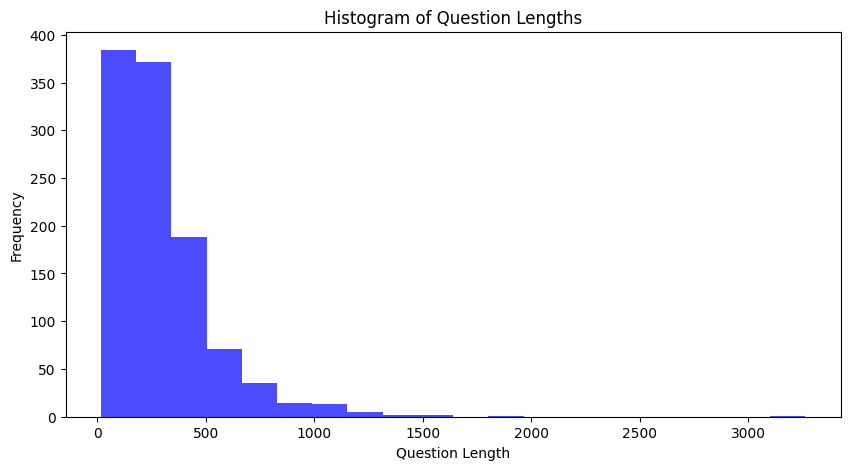

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dfc['title2_length'] = dfc['title2'].apply(len)

plt.figure(figsize=(10, 5))
plt.hist(dfc['title2_length'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Question Lengths')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Max and Min sentence length
max_length = dfc['title2'].apply(len).max()
min_length = dfc['title2'].apply(len).min()
avr_length = dfc['title2'].apply(len).mean()

sentence_with_max_length = dfc[dfc['title2'].apply(len) == max_length]['title2'].iloc[0]
sentence_with_min_length = dfc[dfc['title2'].apply(len) == min_length]['title2'].iloc[0]

print(f"maximum sentence length {max_length} char.")
print(f"sentence with max length: {sentence_with_max_length}")

print(f"min sentence length  {min_length} char.")
print(f"sentence with min length: {sentence_with_min_length}")
print(f"mean sentence length  {avr_length} char.")

maximum sentence length 3264 char.
sentence with max length: من ساکن انگلستان هستم و مدت دو ماهه که بیمار شدم و با وجود مراجعه متعدد به بیمارستان و پزشکان مختلف و ازمایشات گوناگون هنوز نتونستن هیچ تشخیصی به بیماری من بدن و تنها چیزی که تابحال به من گفتن این بوده که من دچار بیماری اضطراب یا پنیک اتک یا بیماری منتال هستم و هیچ درمان و دارویی هم به من ندادن   مشکل من از اونجا شروع شد که یک روز از خواب بیدار شدم و احساس خستگی بینهایت زیادی داشتم   اینو اضافه کنم که من ۴۳ ساله هستم و رژیم غذایی بسیار سالمی دارم و سالهاست که هر روز روزانه ۳ ساعت در حدود ۱۲ کیلومتر پیاده روی دارم هفت روز هفته   نه الکل مینوشم نه سیگار میکشم نه چای و قهوه مینوشم نه فست فود میخورم   در روز ۹ وعده میوه میخورم و غذای سالم و مقوی گردو بادام عسل همگی خام و طبیعی و    اینها رو گفتم که بدونید هیچ مشکلی از نظر تغذیه ندارم   بعد از یک هفته از خستگی مرموز که طوری بود حتا به سختی میتونستم سرپا باشم   یک روز از خواب بیدار شدم و حس کردم دارم میمیرم   یعنی یک حس استرس و ترس شدید داشتم و درد در دست چپ و فشار روی قلب   حس بسی

In [ ]:
# Max and Min number of words
max_words = dfc['title2'].apply(lambda x: len(x.split())).max()
min_words = dfc['title2'].apply(lambda x: len(x.split())).min()
avr_words = dfc['title2'].apply(lambda x: len(x.split())).mean()

title_with_max_words = dfc[dfc['title2'].apply(lambda x: len(x.split())) == max_words]['title2'].iloc[0]
title_with_min_words = dfc[dfc['title2'].apply(lambda x: len(x.split())) == min_words]['title2'].iloc[0]

print(f"Max number of words in a title is {max_words}.")
print(f"Title with max words: {title_with_max_words}")

print(f"The minimum number of words in a title {min_words}.")
print(f"Title with minimum words: {title_with_min_words}")
print(f"The mean number of words in titles {avr_words:.2f}.")


Max number of words in a title is 707.
Title with max words: من ساکن انگلستان هستم و مدت دو ماهه که بیمار شدم و با وجود مراجعه متعدد به بیمارستان و پزشکان مختلف و ازمایشات گوناگون هنوز نتونستن هیچ تشخیصی به بیماری من بدن و تنها چیزی که تابحال به من گفتن این بوده که من دچار بیماری اضطراب یا پنیک اتک یا بیماری منتال هستم و هیچ درمان و دارویی هم به من ندادن   مشکل من از اونجا شروع شد که یک روز از خواب بیدار شدم و احساس خستگی بینهایت زیادی داشتم   اینو اضافه کنم که من ۴۳ ساله هستم و رژیم غذایی بسیار سالمی دارم و سالهاست که هر روز روزانه ۳ ساعت در حدود ۱۲ کیلومتر پیاده روی دارم هفت روز هفته   نه الکل مینوشم نه سیگار میکشم نه چای و قهوه مینوشم نه فست فود میخورم   در روز ۹ وعده میوه میخورم و غذای سالم و مقوی گردو بادام عسل همگی خام و طبیعی و    اینها رو گفتم که بدونید هیچ مشکلی از نظر تغذیه ندارم   بعد از یک هفته از خستگی مرموز که طوری بود حتا به سختی میتونستم سرپا باشم   یک روز از خواب بیدار شدم و حس کردم دارم میمیرم   یعنی یک حس استرس و ترس شدید داشتم و درد در دست چپ و فشار روی قلب   حس بسی

In [ ]:
sentence_with_max_length   # It has 707 words

'من ساکن انگلستان هستم و مدت دو ماهه که بیمار شدم و با وجود مراجعه متعدد به بیمارستان و پزشکان مختلف و ازمایشات گوناگون هنوز نتونستن هیچ تشخیصی به بیماری من بدن و تنها چیزی که تابحال به من گفتن این بوده که من دچار بیماری اضطراب یا پنیک اتک یا بیماری منتال هستم و هیچ درمان و دارویی هم به من ندادن   مشکل من از اونجا شروع شد که یک روز از خواب بیدار شدم و احساس خستگی بینهایت زیادی داشتم   اینو اضافه کنم که من ۴۳ ساله هستم و رژیم غذایی بسیار سالمی دارم و سالهاست که هر روز روزانه ۳ ساعت در حدود ۱۲ کیلومتر پیاده روی دارم هفت روز هفته   نه الکل مینوشم نه سیگار میکشم نه چای و قهوه مینوشم نه فست فود میخورم   در روز ۹ وعده میوه میخورم و غذای سالم و مقوی گردو بادام عسل همگی خام و طبیعی و    اینها رو گفتم که بدونید هیچ مشکلی از نظر تغذیه ندارم   بعد از یک هفته از خستگی مرموز که طوری بود حتا به سختی میتونستم سرپا باشم   یک روز از خواب بیدار شدم و حس کردم دارم میمیرم   یعنی یک حس استرس و ترس شدید داشتم و درد در دست چپ و فشار روی قلب   حس بسیار بدی بود   فورا اورژانس رفتم و از من نوار قلب گرفتن و ازما

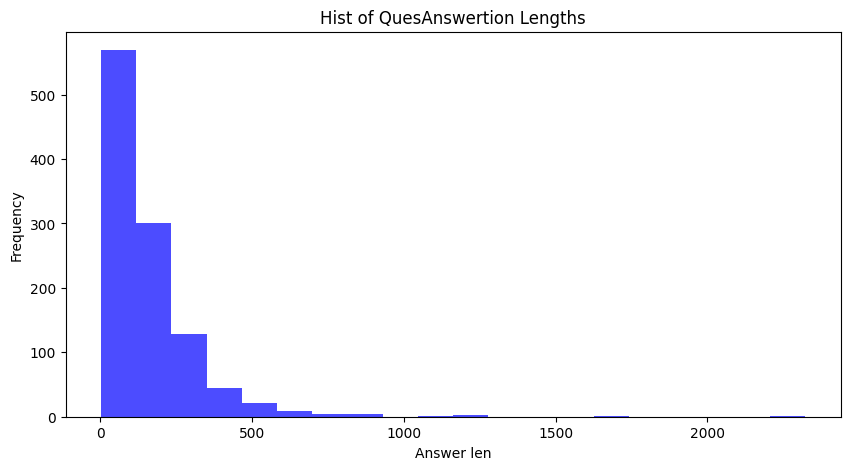

In [ ]:
dfc['body2_length'] = dfc['body2'].apply(len)

plt.figure(figsize=(10, 5))
plt.hist(dfc['body2_length'], bins=20, color='blue', alpha=0.7)
plt.title('Hist of QuesAnswertion Lengths')
plt.xlabel('Answer len')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#maximum sentence length
max_length_body = dfc['body2'].apply(len).max()
min_length_body = dfc['body2'].apply(len).min()
avr_length_body = dfc['body2'].apply(len).mean()

sentence_with_max_length_body = dfc[dfc['body2'].apply(len) == max_length_body]['body2'].iloc[0]
sentence_with_min_length_body = dfc[dfc['body2'].apply(len) == min_length_body]['body2'].iloc[0]


print(f"max body length  {max_length_body} char.")
print(f"Body with max length: {sentence_with_max_length_body}")

print(f"The min body len {min_length_body} char.")
print(f"Body with min len: {sentence_with_min_length_body}")
print(f"The mean body len : {avr_length_body} char.")


max body length  2323 char.
Body with max length: کارکنان بخش سلامت با مواجهات شیمیایی مضر متعددی مواجهه دارند که به ذکر مهم ترین آنها می پردازیم     داروهای شیمی درمانی  اغلب داروهای ضدنئوپلاسم جزء داروهای خطرناک دسته بندی شده و لازم است تماس با آنها با رعایت اصول ایمنی صورت گیرد  این داروها اغلب از طریق جذب پوستی و استنشاقی باعث مواجهه می شوند  در مواجهه کوتاه مدت هنگام آماده سازی یا حمل دارو در محیط با تهویه غیرمناسب امکان بروز علائم تحریکی چشم ها  عطسه  آبریزش بینی  سردرد   ریزش مو  واکنش های آلرژیک و یا تحریک و راش پوستی وجود دارد و در مواجهات مزمن می توانند باعث بروز بدخیمی  اختلالات باروری  تراتوژنیسیتی و آسیب های ارگانی گردند  از جمله داروهای ضدنئوپلاسم میتوان به بلئومایسین  بوسولفان  کربوپلاتین  کلرامبوسیل  سیس پلاتین  سیکلوفوسفامید  سیتارابین و دوکسوروبیسین اشاره کرد  لیست کامل داروهای خطرناک در پایگاه NIOSH قابل دسترسی می باشد از جمله نکات مهم در خصوص مواجهه با این داروها این است که بسیاری از داروهای شیمی درمانی علاوه بر بیماران مبتلا به بدخیمی در بسیاری موارد دیگر از جمله ب

In [ ]:
#max and min number of words
max_words = dfc['body2'].apply(lambda x: len(x.split())).max()
min_words = dfc['body2'].apply(lambda x: len(x.split())).min()
avr_words = dfc['body2'].apply(lambda x: len(x.split())).mean()

body_with_max_words = dfc[dfc['body2'].apply(lambda x: len(x.split())) == max_words]['body2'].iloc[0]
body_with_min_words = dfc[dfc['body2'].apply(lambda x: len(x.split())) == min_words]['body2'].iloc[0]

print(f"max number of words in a body is {max_words}.")
print(f"body with max words: {body_with_max_words}")

print(f"min number of words in a body is {min_words}.")
print(f"body with min words: {body_with_min_words}")
print(f"The mean number of words in body is {avr_words:.2f}.")


max number of words in a body is 429.
body with max words: کارکنان بخش سلامت با مواجهات شیمیایی مضر متعددی مواجهه دارند که به ذکر مهم ترین آنها می پردازیم     داروهای شیمی درمانی  اغلب داروهای ضدنئوپلاسم جزء داروهای خطرناک دسته بندی شده و لازم است تماس با آنها با رعایت اصول ایمنی صورت گیرد  این داروها اغلب از طریق جذب پوستی و استنشاقی باعث مواجهه می شوند  در مواجهه کوتاه مدت هنگام آماده سازی یا حمل دارو در محیط با تهویه غیرمناسب امکان بروز علائم تحریکی چشم ها  عطسه  آبریزش بینی  سردرد   ریزش مو  واکنش های آلرژیک و یا تحریک و راش پوستی وجود دارد و در مواجهات مزمن می توانند باعث بروز بدخیمی  اختلالات باروری  تراتوژنیسیتی و آسیب های ارگانی گردند  از جمله داروهای ضدنئوپلاسم میتوان به بلئومایسین  بوسولفان  کربوپلاتین  کلرامبوسیل  سیس پلاتین  سیکلوفوسفامید  سیتارابین و دوکسوروبیسین اشاره کرد  لیست کامل داروهای خطرناک در پایگاه NIOSH قابل دسترسی می باشد از جمله نکات مهم در خصوص مواجهه با این داروها این است که بسیاری از داروهای شیمی درمانی علاوه بر بیماران مبتلا به بدخیمی در بسیاری موارد دیگر 

In [ ]:
sentence_with_max_length_body   # it hs 429 words

'کارکنان بخش سلامت با مواجهات شیمیایی مضر متعددی مواجهه دارند که به ذکر مهم ترین آنها می پردازیم     داروهای شیمی درمانی  اغلب داروهای ضدنئوپلاسم جزء داروهای خطرناک دسته بندی شده و لازم است تماس با آنها با رعایت اصول ایمنی صورت گیرد  این داروها اغلب از طریق جذب پوستی و استنشاقی باعث مواجهه می شوند  در مواجهه کوتاه مدت هنگام آماده سازی یا حمل دارو در محیط با تهویه غیرمناسب امکان بروز علائم تحریکی چشم ها  عطسه  آبریزش بینی  سردرد   ریزش مو  واکنش های آلرژیک و یا تحریک و راش پوستی وجود دارد و در مواجهات مزمن می توانند باعث بروز بدخیمی  اختلالات باروری  تراتوژنیسیتی و آسیب های ارگانی گردند  از جمله داروهای ضدنئوپلاسم میتوان به بلئومایسین  بوسولفان  کربوپلاتین  کلرامبوسیل  سیس پلاتین  سیکلوفوسفامید  سیتارابین و دوکسوروبیسین اشاره کرد  لیست کامل داروهای خطرناک در پایگاه NIOSH قابل دسترسی می باشد از جمله نکات مهم در خصوص مواجهه با این داروها این است که بسیاری از داروهای شیمی درمانی علاوه بر بیماران مبتلا به بدخیمی در بسیاری موارد دیگر از جمله بیماری های زنان  روماتولوژی  پوست و نورولوژی و   ا

In [ ]:
from hazm import word_tokenize, Normalizer, stopwords_list, sent_tokenize
from collections import Counter
import pandas as pd
from hazm import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [ ]:
# normalize function for body and title

normalizer = Normalizer()
stopwords = stopwords_list()

# dfc = pd.read_csv("output_without_n.csv", encoding='utf-8')

#normalize the text in each row
dfc['normalized_title'] = dfc['title2'].apply(normalizer.normalize)
dfc['normalized_body'] = dfc['body2'].apply(normalizer.normalize)

#tokenize the normalized text and remove stopwords for title
dfc['tokenized_title'] = dfc['normalized_title'].apply(word_tokenize)
dfc['toknize_sent_title'] = dfc['normalized_title'].apply(sent_tokenize)
dfc['tokenized_title'] = dfc['tokenized_title'].apply(lambda tokens: [token for token in tokens if token not in stopwords_list()])

# tokenize and sentence tokenize the normalized text and remove stopwords for body
dfc['tokenized_body'] = dfc['normalized_body'].apply(word_tokenize)
dfc['toknize_sent_body'] = dfc['normalized_body'].apply(sent_tokenize)
dfc['tokenized_body'] = dfc['tokenized_body'].apply(lambda tokens: [token for token in tokens if token not in stopwords_list()])

# flatten the tokenize
token_list_title = [token for tokens in dfc['tokenized_title'] for token in tokens]
token_list_body = [token for tokens in dfc['tokenized_body'] for token in tokens]

term_counts_title = Counter(token_list_title)
term_counts_body = Counter(token_list_body)

term_counts_df_title = pd.DataFrame.from_dict(term_counts_title, orient='index', columns=['count'])
term_counts_df_body = pd.DataFrame.from_dict(term_counts_body, orient='index', columns=['count'])

# term_counts_df_title.to_excel('term_counts_title.xlsx')
# term_counts_df_body.to_excel('term_counts_body.xlsx')


In [ ]:
dfc["body2"].iloc[4]

'                               جزو عوارض دارو خشکی دهان هست   البته نسبت به داروهای هم خانواده ش کمتر این عارضه رو میده  دوز مصرفی دارو هم مهمه'

In [ ]:
dfc["body2"].iloc[22]

'اینکه افت شنوایی کمتر شده به این معنی نیست که کاملا خوب میشه یا برطرف میشه در هر صورت مهمترین قسمت قضیه اینه که الان که اوج غان و غون کودک هست شما از سمعک استفاده کنید و برنامه های توانبخشی داشته باشین تا کودک بتونه صدای خودش رو بشنوه و زبان و گفتارش رشد کنه اگر شما زمان طلاییش رو از دست بدین دیگه هیچ وقت مثل ما حرف نخواهد زد پس پیشنهادم اینه بپذیرید مشکل رو و زودتر اقدام کنید برای درمان اگر هم انشا   افت شنواییش کمتر شد که بهتر اما حتی در کم شنوایی های خفیف هم ما مشکلات زبانی و گفتاری رو میبینیم پس مهمترین اصل خدمات توانبخشی مثل گفتاردرمانی و تربیت شنیداری هست              '

In [ ]:
dfc["title2"].iloc[102]

'من چن وقت قبل از ارتفاع به شدت پرت شدم و زیرشکمم درد شدیدی حس کردم  پیش متخصص رفتم هم برا تشخیص نوع پرده هم احتمال آسیب دیدنش اما ایشون گفتن که پرده با افتادن آسیب نمیبینه هیچ نیازیم به معاینه نیس متاسفانه تنها متخصص شهرمون هستن و کسی دیگه ای نیس که بهشون مراجعه کنم  طبق مطالبی که از نت خوندم و شکل ظاهری واژنم حس میکنم دوتکه هستش اما عکسایی که دیدم یه تیغه عمودی هست که مجرا رو به دوبخش راست و چپ تقسیم میکنه و مال من تیغه افقیه و مجراش دو بخش بالایی و پایینیه  البته این چیزی که من میبینم خارجی ترین بخش هست درحالیکه میگن پرده حداقل یک سانت داخله  آیا ممکنه این نوع شکل ظاهری در اثر آسیب دیدگی پرده باشه  لطفا کمک کنید من امکان مراجعه به پزشک یا ماما رو ندارم ممنونم'